# Installation libs

In [98]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
%pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
%pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
%pip install numpy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
import pandas as pd
import matplotlib.pyplot as plt


# Découverte des données

In [103]:
data = pd.read_csv("../../Big Data/csvOutput.csv")
data.head()

,Num_Acc,num_veh,id_usa,date,ville,id_code_insee,latitude,longitude,descr_cat_veh,descr_agglo,...,description_intersection,an_nais,age,place,descr_dispo_secu,descr_grav,descr_motif_traj,descr_type_col,region,departement
0,200900000016,B02,743965,2009-01-14 08:45:00,PANNECE,44118,47.4833,-1.233330,2,Hors agglomération,...,Hors intersection,1969,40,1,Utilisation d'une ceinture de sécurité,0,Utilisation professionnelle,Deux véhicules - Frontale,Pays de la Loire,Loire-Atlantique
1,200900000559,B02,745034,2009-01-06 11:30:00,ST GENIX LES VILLAGES,73236,45.6000,5.633330,1,Hors agglomération,...,Hors intersection,1959,50,1,Utilisation d'une ceinture de sécurité,0,Utilisation professionnelle,Deux véhicules - Frontale,Auvergne-Rhône-Alpes,Savoie
2,200900000560,B02,745035,2009-01-06 17:00:00,ST GENIX LES VILLAGES,73236,45.6000,5.633330,1,Hors agglomération,...,Hors intersection,1960,49,1,Utilisation d'une ceinture de sécurité,0,Utilisation professionnelle,Deux véhicules - Frontale,Auvergne-Rhône-Alpes,Savoie
3,200900001109,B02,746121,2009-01-31 20:00:00,ST LAURENT DE LA SALANQUE,66180,42.7667,2.983330,1,Hors agglomération,...,Hors intersection,1957,52,1,Utilisation d'une ceinture de sécurité,0,Promenade – loisirs,Deux véhicules - Frontale,Occitanie,Pyrénées-Orientales
4,200900001120,A01,746149,2009-02-18 17:45:00,SOUVIGNE,16373,45.9667,0.066667,1,Hors agglomération,...,Intersection en X,1951,58,1,Utilisation d'une ceinture de sécurité,0,Utilisation professionnelle,Deux véhicules - Frontale,Nouvelle-Aquitaine,Charente


nombre d'instance, pour chaque argument ( ici tous la mm val donc 👍)

In [104]:
data.info()
#73632 instances

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73632 entries, 0 to 73631
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Num_Acc                   73632 non-null  int64  
 1   num_veh                   73632 non-null  object 
 2   id_usa                    73632 non-null  int64  
 3   date                      73632 non-null  object 
 4   ville                     73632 non-null  object 
 5   id_code_insee             73632 non-null  object 
 6   latitude                  73632 non-null  float64
 7   longitude                 73632 non-null  float64
 8   descr_cat_veh             73632 non-null  int64  
 9   descr_agglo               73632 non-null  object 
 10  descr_athmo               73632 non-null  object 
 11  descr_lum                 73632 non-null  object 
 12  descr_etat_surf           73632 non-null  object 
 13  description_intersection  73632 non-null  object 
 14  an_nai

nombre d'instance par classe

In [105]:
#instance par classe = nb itérations par classe
data["descr_grav"].value_counts()

descr_grav
0    31001
1    25667
2    14888
3     2076
Name: count, dtype: int64

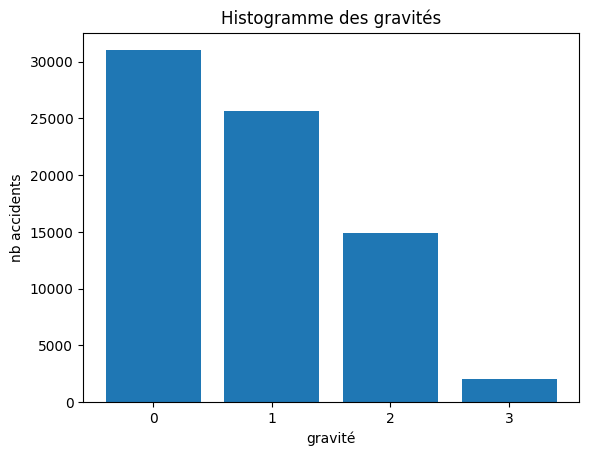

In [106]:
# Plot histogramme
list_uniq = [str(element) for element in (data['descr_grav']).sort_values().unique()]

plt.bar(list_uniq,data['descr_grav'].value_counts())
plt.xlabel('gravité')
plt.ylabel('nb accidents')
plt.title('Histogramme des gravités')
plt.show()

on remarque très peu de cas de gravité 3

In [107]:
data.describe()

,Num_Acc,id_usa,latitude,longitude,descr_cat_veh,an_nais,age,place,descr_grav
count,7.363200e+04,73632.000000,73632.000000,73632.000000,73632.000000,73632.000000,73632.000000,73632.000000,73632.000000
mean,2.009000e+11,820020.999307,46.834532,2.329339,1.786900,1971.538027,37.461973,1.633461,0.837557
std,2.135221e+04,47716.523476,4.932302,6.173604,1.381241,17.450844,17.450844,2.011992,0.842389
min,2.009000e+11,743948.000000,-21.281500,-61.792200,1.000000,1900.000000,0.000000,1.000000,0.000000
25%,2.009000e+11,777605.750000,45.483300,1.350000,1.000000,1960.000000,23.000000,1.000000,0.000000
50%,2.009000e+11,816313.500000,48.198100,2.383330,1.000000,1975.000000,34.000000,1.000000,1.000000
75%,2.009001e+11,859486.250000,48.869100,4.500000,3.000000,1986.000000,49.000000,1.000000,1.000000
max,2.009001e+11,909853.000000,51.050000,55.697200,7.000000,2009.000000,109.000000,10.000000,3.000000


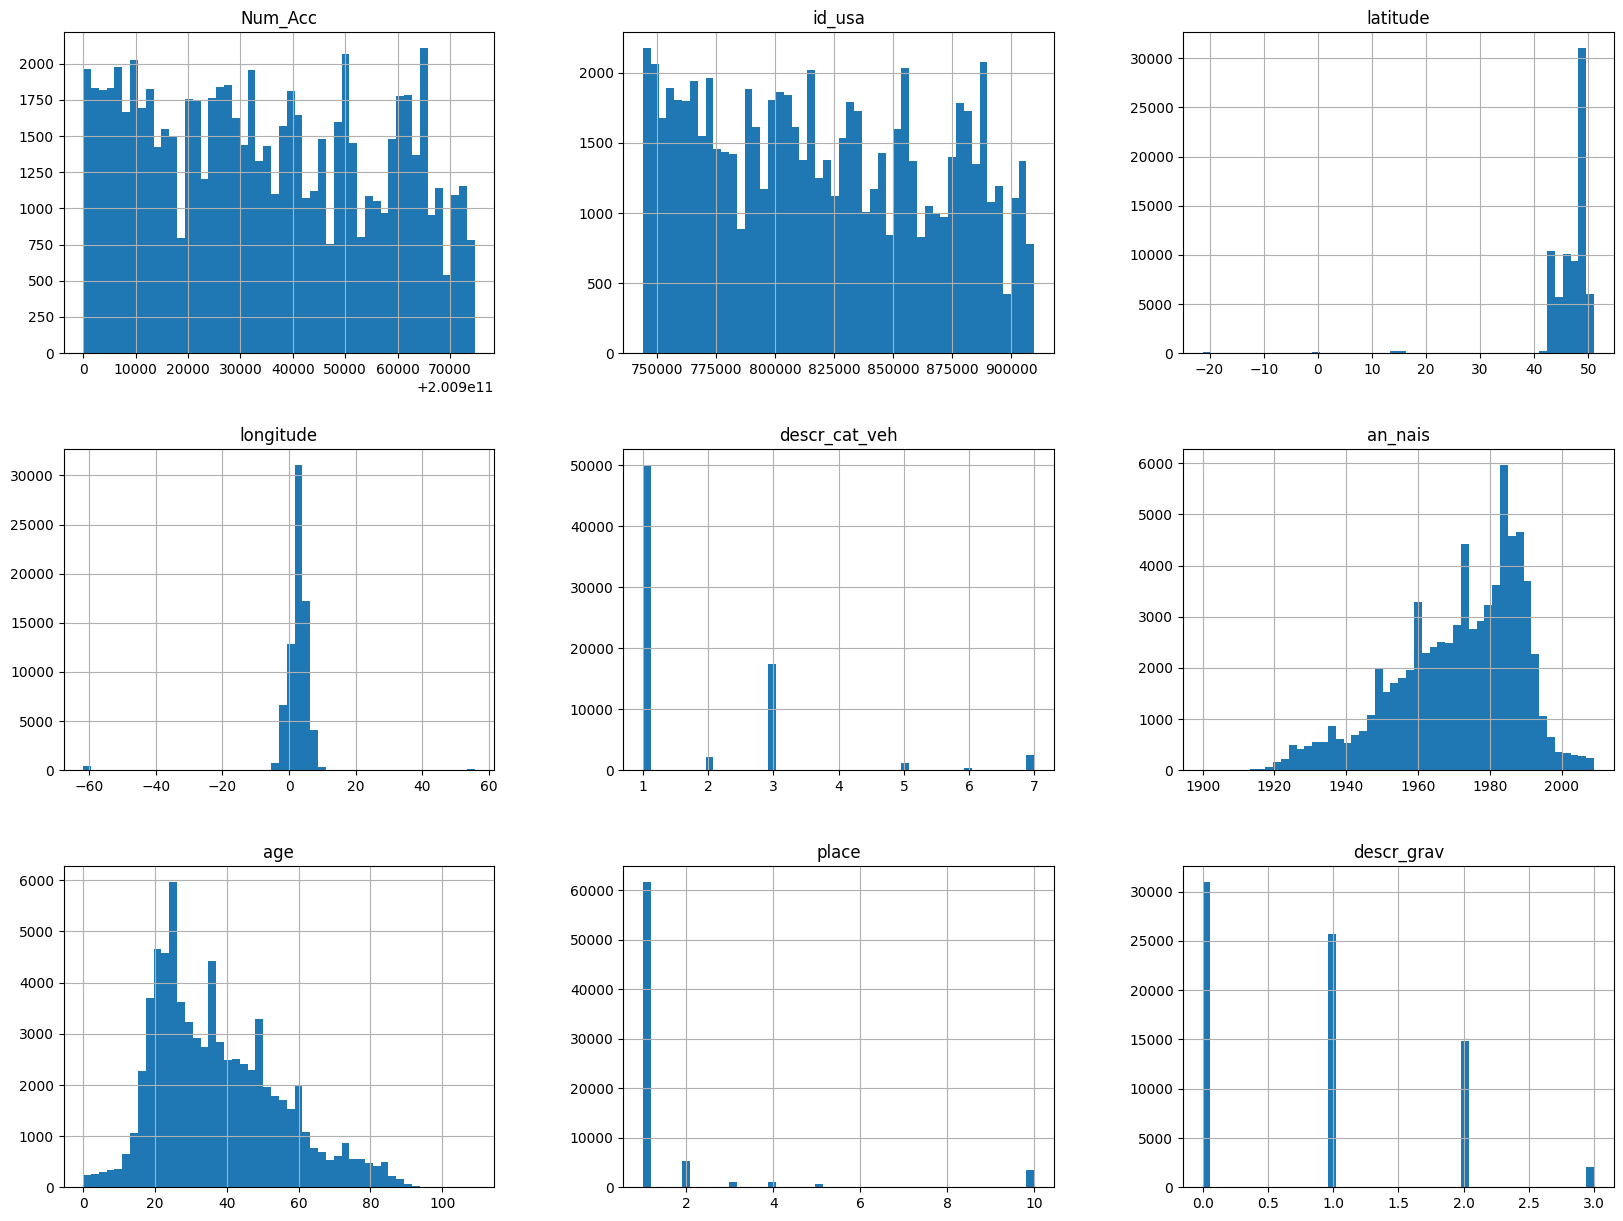

In [108]:
data.hist(bins=50,figsize=(20,15))
plt.show()

# Préparation des données

## Conversion des données dates

In [109]:

data['date'] = pd.to_datetime(data['date'])

# Convert 'Date' column to numeric format
data['date'] = data['date'].dt.strftime('%Y%m%d%H%M%S')

# Display the updated DataFrame
print(data['date'])

0        20090114084500
1        20090106113000
2        20090106170000
3        20090131200000
4        20090218174500
              ...      
73627    20091211184500
73628    20091222100000
73629    20091226210000
73630    20091222122000
73631    20091029144000
Name: date, Length: 73632, dtype: object


j'ai finalement converti en STR et non en entier car, le nombre entier donné était trop gros pour python 

Conversion to csv pour les autres

In [113]:

data.to_csv("../df.csv",sep=",",index=False)